[6] 102.00000000000001 1.7000000000000002
[9] 160.00000000000003 2.0000000000000004
[11] 219.99999999999991 2.1999999999999993
[13] 288.0 2.4
[14] 375.00000000000017 2.5000000000000013
[17] 559.9999999999998 2.799999999999999
[18] 725.0000000000003 2.9000000000000012


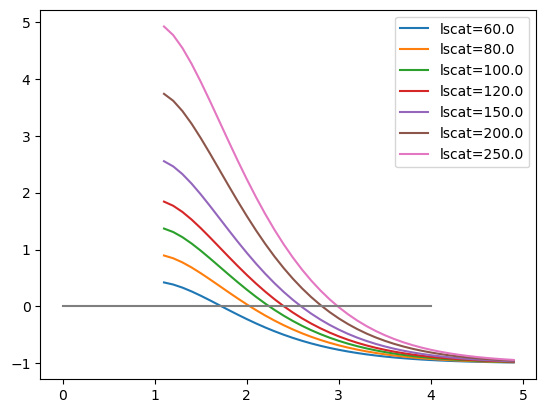

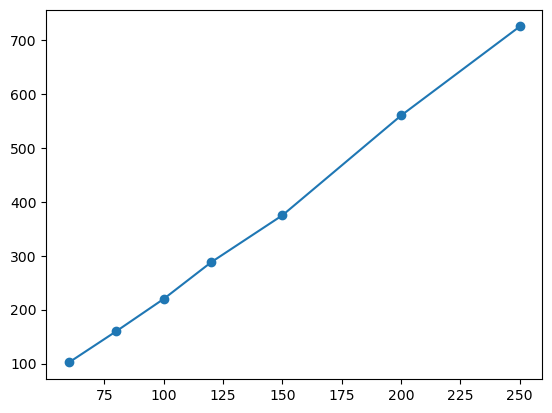

In [42]:
import numpy as np
import matplotlib.pyplot as plt


#### ALL IN CENTIMETERS

##############################  2PE case ############################################

GM      = 1e-50 # one goeppert meyere, cm^4*s

sigma2  = 100 * GM
NA      = 0.5

SB      = 1   ###signal/noise 
wavel   = 800e-7 ## 
lscat = np.array([60e-4,80e-4,100e-4,120e-4,150e-4,200e-4,250e-4]) # scattering length 
RI = 1.33 # ref. index

def out_Of_Focus_2pe(z,lscat,NA,RI,wavel):
    return (z**2) * (NA**2) * np.exp(-2*z/lscat) /(wavel * lscat * RI*RI)


plt.figure()
L_Res = []
for k in range(lscat.size):
    z = np.arange(1.1*lscat[k],5*lscat[k],0.1*lscat[k])

    OF_2pe = out_Of_Focus_2pe(z,lscat[k],NA,RI,wavel) - SB 
    idx = np.where(np.diff(np.sign(OF_2pe)))[0]
    print (idx,z[idx[0]]*1e4,z[idx[0]] / lscat[k])
    L_Res.append([lscat[k],z[idx[0]]])
    plt.plot(z/lscat[k],OF_2pe,label='lscat='+str(lscat[k]*1e4))
plt.legend()
plt.plot([0,4],[0,0])

Results = np.array(L_Res)
plt.figure()
plt.plot(Results[:,0]*1e4,Results[:,1]*1e4,'-o')

In [43]:
ResultsNA05= Results

Text(0.5, 1.0, 'Two photons excitation')

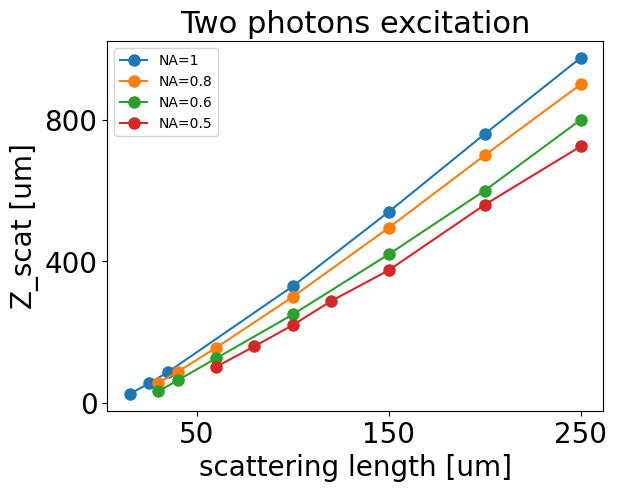

In [94]:
plt.figure()
plt.plot(ResultsNA1[:,0]*1e4,ResultsNA1[:,1]*1e4,'-o',label='NA=1',markersize=8)
plt.plot(ResultsNA08[:,0]*1e4,ResultsNA08[:,1]*1e4,'-o',label='NA=0.8',markersize=8)
plt.plot(ResultsNA06[:,0]*1e4,ResultsNA06[:,1]*1e4,'-o',label='NA=0.6',markersize=8)
plt.plot(ResultsNA05[:,0]*1e4,ResultsNA05[:,1]*1e4,'-o',label='NA=0.5',markersize=8)
plt.legend()
plt.xlabel('scattering length [um]',fontsize=20)
plt.ylabel('Z_scat [um]',fontsize=20)
plt.xticks([50,150,250],fontsize=20)
plt.yticks([0,400,800],fontsize=20)
plt.title('Two photons excitation',fontsize=22)


[46] 284.99999999999983 5.699999999999996
[52] 472.50000000000034 6.300000000000005
[55] 659.9999999999994 6.599999999999994
[60] 1065.000000000001 7.100000000000006
[64] 1499.9999999999989 7.499999999999994
[66] 1925.0000000000014 7.7000000000000055


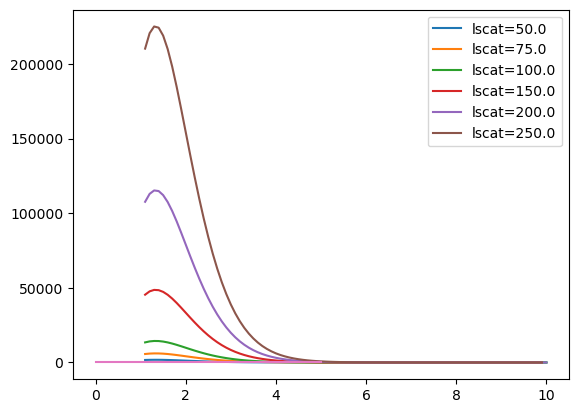

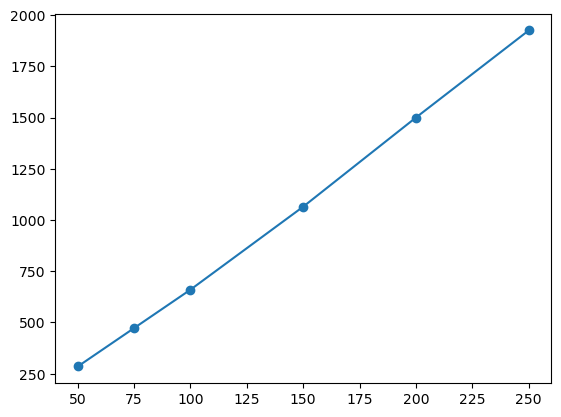

In [89]:
import numpy as np
import matplotlib.pyplot as plt


#### ALL IN CENTIMETERS

##############################  three PE case ############################################

GM      = 1e-80 #  cm^6*s

sigma3  = 0.3 * GM
NA      = 1

SB      = 1   ###signal/noise 
wavel   = 1300e-7 ## 
lscat = np.array([50e-4,75e-4,100e-4,150e-4,200e-4,250e-4]) # scattering length 
RI = 1.33 # ref. index

def out_Of_Focus_3pe(z,lscat,NA,RI,wavel):
    w0 = 0.6*wavel/NA
    return  np.exp(-3*z/lscat) /(wavel * lscat) * (np.pi*z*z*NA*NA/(4*RI*RI*w0))**2


plt.figure()
L_Res3 = []
for k in range(lscat.size):
    z = np.arange(1.1*lscat[k],10*lscat[k],0.1*lscat[k])

    OF_3pe = out_Of_Focus_3pe(z,lscat[k],NA,RI,wavel) - SB 
    idx = np.where(np.diff(np.sign(OF_3pe)))[0]
    print (idx,z[idx[0]]*1e4,z[idx[0]] / lscat[k])
    L_Res3.append([lscat[k],z[idx[0]]])
    plt.plot(z/lscat[k],(OF_3pe),label='lscat='+str(lscat[k]*1e4))
plt.legend()
plt.plot([0,5],[0,0])

Results = np.array(L_Res3)
plt.figure()
plt.plot(Results[:,0]*1e4,Results[:,1]*1e4,'-o')

In [90]:
Results3_NA1= Results

([<matplotlib.axis.YTick at 0x167410fb850>,
 [Text(0, 200, '200'),
  Text(0, 600, '600'),
  Text(0, 1000, '1000'),
  Text(0, 1400, '1400'),
  Text(0, 1800, '1800')])

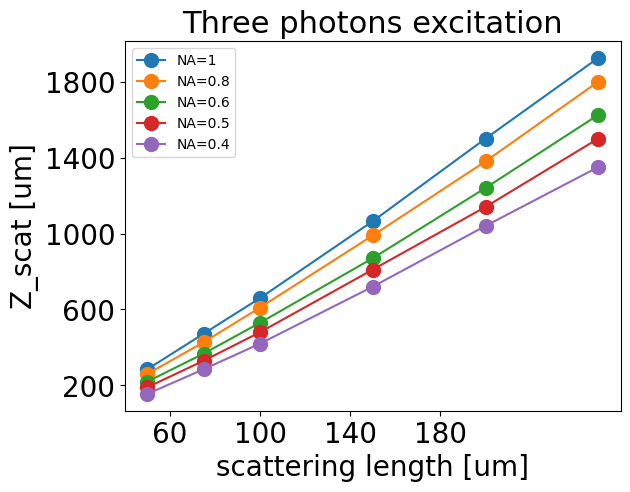

In [93]:
plt.figure()
plt.title('Three photons excitation',fontsize=22)
plt.plot(Results3_NA1[:,0]*1e4,Results3_NA1[:,1]*1e4,'-o',label='NA=1',markersize=10)
plt.plot(Results3_NA08[:,0]*1e4,Results3_NA08[:,1]*1e4,'-o',label='NA=0.8',markersize=10)
plt.plot(Results3_NA06[:,0]*1e4,Results3_NA06[:,1]*1e4,'-o',label='NA=0.6',markersize=10)
plt.plot(Results3_NA05[:,0]*1e4,Results3_NA05[:,1]*1e4,'-o',label='NA=0.5',markersize=10)
plt.plot(Results3_NA04[:,0]*1e4,Results3_NA04[:,1]*1e4,'-o',label='NA=0.4',markersize=10)
plt.legend()
plt.xlabel('scattering length [um]',fontsize=20)
plt.ylabel('Z_scat [um]',fontsize=20)
plt.xticks([60,100,140,180],fontsize=20)
plt.yticks([200,600,1000,1400,1800],fontsize=20)
